In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,f1_score,accuracy_score,recall_score,precision_score
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [294]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


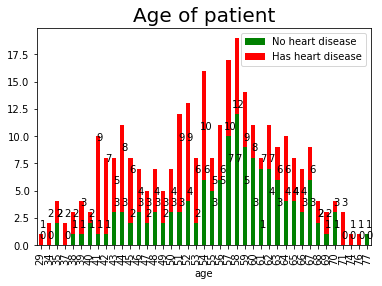

In [295]:
counts = df.groupby(['age', 'target']).age.count().unstack()

ax = counts.plot(kind='bar',stacked = True, color=['green', 'red'])

for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(2, 10), textcoords='offset points')

L=plt.legend()
# I put no heart disease, quoting the uc irvine data set description, 
#"Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)."
L.get_texts()[0].set_text('No heart disease')
L.get_texts()[1].set_text('Has heart disease')
        
plt.title('Age of patient',fontsize=20)
plt.show()

In [296]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


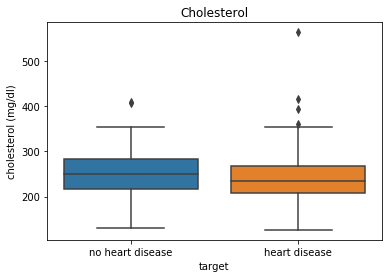

In [297]:
ax = sns.boxplot('target', 'chol', data=df)
ax.set_title('Cholesterol')
ax.set_ylabel('cholesterol (mg/dl)')
ax.set_xticklabels(['no heart disease','heart disease'])

plt.show()

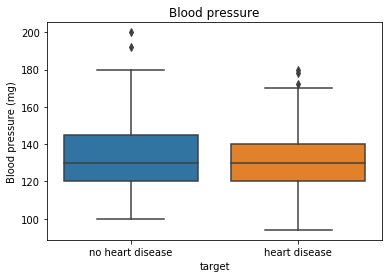

In [298]:
ax = sns.boxplot('target', 'trestbps', data=df)
ax.set_title('Blood pressure')
ax.set_ylabel('Blood pressure (mg)')
ax.set_xticklabels(['no heart disease','heart disease'])

plt.show()

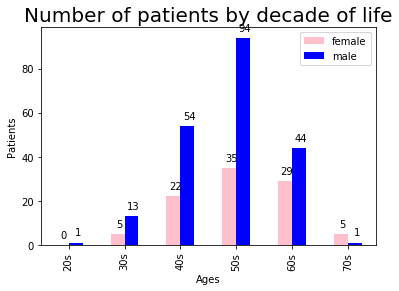

In [299]:
df_plot = df.copy()
bins = np.arange(20, 80, 10)
df_plot['category'] = np.digitize(df_plot.age, bins, right=True)

counts = df_plot.groupby(['category', 'sex']).age.count().unstack()

#print(counts)

ax = counts.plot(kind='bar',stacked = False, color=['pink', 'blue'])

for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(2, 10), textcoords='offset points')
L=plt.legend()
L.get_texts()[0].set_text('female')
L.get_texts()[1].set_text('male')
ax.set_xticklabels(['20s','30s','40s','50s','60s','70s'])
plt.xlabel ('Ages')
plt.ylabel ('Patients')
plt.title('Number of patients by decade of life',fontsize=20)
plt.show()

In [300]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [301]:
# break out categorical columns to dummy variables
#print(df['cp'].dtype)
#print(df['sex'].dtype)
df_c = df
# change 0's in cp columns to 5
# cp: chest pain type 
#-- Value 1(0): typical angina 
#-- Value 2(1): atypical angina 
#-- Value 3(2): non-anginal pain 
#-- Value 4(3): asymptomatic

#sex: sex (1 = male; 0 = female)

#exang: exercise induced angina (1 = yes; 0 = no)

df_c['cp'] = df_c['cp'].apply(str)
df_c['sex'] = df_c['sex'].apply(str)
df_c['fbs'] = df_c['fbs'].apply(str)
df_c['restecg'] = df_c['restecg'].apply(str)
df_c['exang'] = df_c['exang'].apply(str)
df_c['slope'] = df_c['slope'].apply(str)
df_c['thal'] = df_c['thal'].apply(str)

df_c = pd.get_dummies(df_c)

#scale age,trestbps, chol,thalach,oldpeak [0-1]
scaler = MinMaxScaler()
df_c[['age','trestbps','chol','thalach','oldpeak']] = scaler.fit_transform(df_c[['age','trestbps','chol','thalach','oldpeak']])

df_c.head()



C:\Users\mark.howarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,trestbps,chol,thalach,oldpeak,ca,target,sex_0,sex_1,cp_0,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0.562500,0.245283,0.251142,0.816794,0.129032,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0


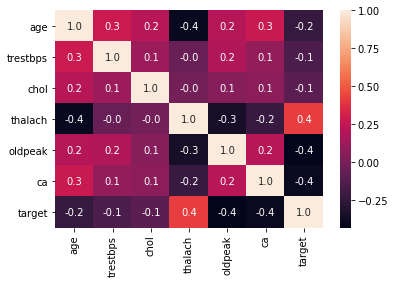

In [302]:
sns.heatmap(df.corr(),annot=True,fmt='.1f')

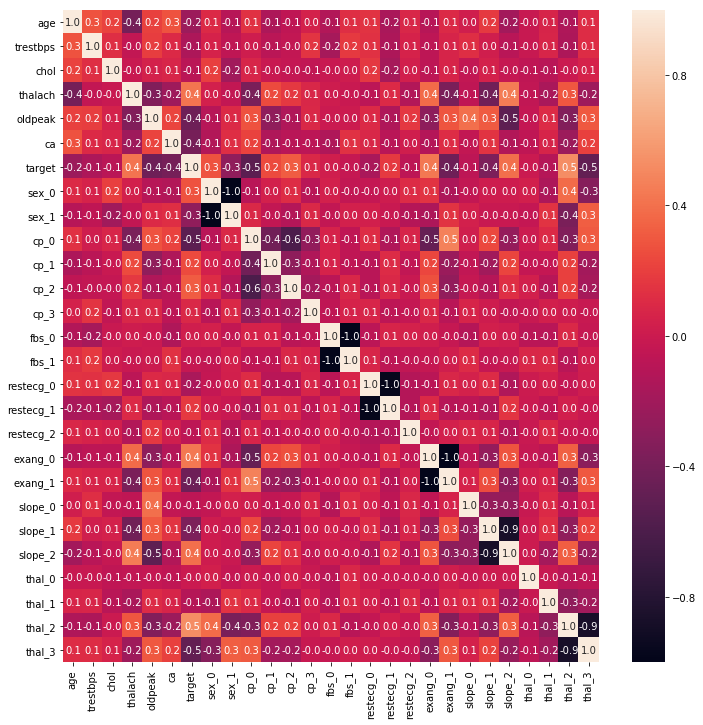

In [303]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_c.corr(),annot=True,fmt='.1f')

In [304]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

def ScoreAlgorithm(df,model,name):
    y = df['target']
    X = df.drop('target',axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 
    model.fit(X_train, y_train)
    y_test_preds = model.predict(X_test)
    return pd.Series([accuracy_score(y_test, y_test_preds),f1_score(y_test, y_test_preds),recall_score(y_test, y_test_preds),precision_score(y_test, y_test_preds)], index=['accuracy', 'f1', 'recall','precision'],name=name)
    

In [305]:

df_scores = pd.DataFrame()

models = [('LR', LogisticRegression()),('SWM',SVC()),('KNN',KNeighborsClassifier()),('NB',GaussianNB()),('GB',GradientBoostingClassifier())]

for index in range(len(models)):
    series = ScoreAlgorithm(df_c,models[index][1],models[index][0])
    df_scores = df_scores.append(series)
    #print ('scores: ', series)

df_scores.head()

C:\Users\mark.howarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mark.howarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,accuracy,f1,precision,recall
LR,0.813187,0.828283,0.836735,0.82
SWM,0.813187,0.828283,0.836735,0.82
KNN,0.824176,0.840000,0.840000,0.84
NB,0.813187,0.821053,0.866667,0.78
GB,0.769231,0.778947,0.822222,0.74


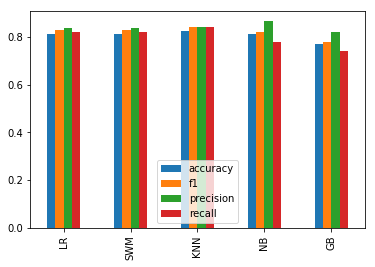

In [341]:
# model this data

df_scores.plot(kind='bar')
plt.show()
#sns.catplot(x='index', kind='bar', data=df_p, legend=True,palette= myPalette)

#print(p.palette)
#plt.xlabel("Classifiers")
#plt.ylabel("Recall score")
#plt.show(p)

In [306]:
#Should I have a different model for women and men
df_w = df_c[df_c['sex_0']==1]

print('training data size for women: ', df_w.shape[0])
df_scores_women = pd.DataFrame()
for index in range(len(models)):
    series = ScoreAlgorithm(df_w,models[index][1],models[index][0])
    df_scores_women = df_scores_women.append(series)
    #print ('scores: ', series)

df_scores_women.head()

training data size for women:  96


C:\Users\mark.howarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mark.howarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,accuracy,f1,precision,recall
LR,0.931034,0.954545,0.954545,0.954545
SWM,0.965517,0.977778,0.956522,1.000000
KNN,0.896552,0.933333,0.913043,0.954545
NB,0.965517,0.977778,0.956522,1.000000
GB,0.931034,0.956522,0.916667,1.000000


In [328]:
df_m = df_c[df_c['sex_1']==1]
print('training data size for men: ', df_m.shape[0])
df_scores_men = pd.DataFrame()
for index in range(len(models)):
    series = ScoreAlgorithm(df_m,models[index][1],models[index][0])
    df_scores_men = df_scores_men.append(series)
    #print ('scores: ', series)

df_scores_men.head()

training data size for men:  207


C:\Users\mark.howarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mark.howarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,accuracy,f1,precision,recall
LR,0.714286,0.653846,0.629630,0.68
SWM,0.809524,0.777778,0.724138,0.84
KNN,0.746032,0.692308,0.666667,0.72
NB,0.412698,0.574713,0.403226,1.00
GB,0.825397,0.807018,0.718750,0.92


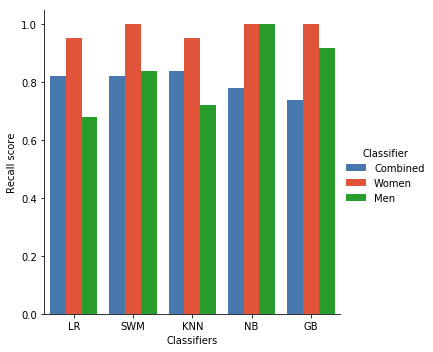

In [339]:
df_p = pd.concat([df_scores,df_scores_women,df_scores_men], axis=0, ignore_index=False)
df_p['Classifier'] = (len(df_scores)*("Combined",) + len(df_scores_women)*("Women",)+ len(df_scores_men)*("Men",))
df_p.reset_index(inplace=True)

colors = ["windows blue", "orange red", "green"]  
myPalette = sns.xkcd_palette(colors)
p = sns.catplot(x='index', y='recall',hue='Classifier', kind='bar', data=df_p, legend=True,palette= myPalette)

#print(p.palette)
plt.xlabel("Classifiers")
plt.ylabel("Recall score")
plt.show(p)

In [309]:
#subset of data